Cube - Sphere Testing

In [ ]:
import numpy as np
import itertools 

from mayavi import mlab

from cube_sphere import Cube, Sphere

In [ ]:
sphere = Sphere(1, definition = 5)
sphere_normals, sphere_centers = sphere.get_sphere_normals(return_centers=True)

In [ ]:
X = sphere().T[0]
Y = sphere().T[1]
Z = sphere().T[2]

C = np.repeat(np.array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1]), len(Z)/6)

pts = mlab.points3d(X, Y, Z)
pts.glyph.scale_mode = 'scale_by_vector'
pts.mlab_source.dataset.point_data.scalars = C

#pts_2 = mlab.points3d(sphere_centers.T[0], sphere_centers.T[1], sphere_centers.T[2])

vectors = mlab.quiver3d(sphere_centers.T[0], sphere_centers.T[1], sphere_centers.T[2], 
                        sphere_normals.T[0], sphere_normals.T[1], sphere_normals.T[2])

mlab.show()

System Testing

In [1]:
from system import System
from amuse.units import units as u
import numpy as np

system_info = {
    "stars" : { 
        "Sun" : {
            "name"     : "Sun",
            "mass"     : 1 | u.MSun,
            "radius"   : 1 | u.RSun,
            "semimajor_axis" : 0 | u.au,
            "orbital_phase" : 0,
            "luminosity" : 1 | u.LSun,
            },
        },
    
    "planets" : { 
        "Earth" : {
            "name"     : "Earth",
            "mass"     : 1 | u.MEarth,
            "radius"   : 1 | u.REarth,
            "semimajor_axis" : 1 | u.au,
            "orbital_phase" : np.pi/4,
            },
        
        "Jupiter" : {
            "name"     : "Jupiter",
            "mass"     : 1 | u.MJupiter,
            "radius"   : 1 | u.RJupiter,
            "semimajor_axis" : 5 | u.au,
            "orbital_phase" : np.pi/6,
            },
        
        },
    
    "asteroids" : {
        "Bennu" : {
            "name"     : "Bennu",
            "mass"     : 73e9 | u.kg,
            "radius"   : 0.24 | u.km,
            "semimajor_axis" : 1.126 | u.au,
            "orbital_phase" : np.pi/4,
            },
        }
    }

In [2]:
system = System(system_info)

In [ ]:
system.get_gravity_at_point(0,0,0,0)

In [ ]:
system.calculate_flux(system.asteroids[0])

Asteroid Testing

In [ ]:
from amuse.lab import Particles, Particle
from asteroid import Asteroid
from amuse.units import units as u

In [ ]:
ast_1 = Asteroid(10 | u.m)
ast_1.position = (1, 1, 0) | u.AU
ast_1.velocity = (10, 10, 0) | u.kms
ast_1.name = "Asteroid 1"

Composite Testing

In [3]:
from bridge import Evolve
timestep = 0.05
endtime = 20

system = Evolve(system, timestep, endtime)

100%|██████████| 400/400 [10:17<00:00,  1.54s/it]


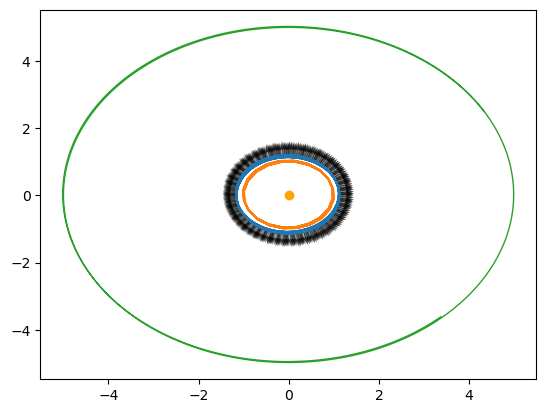

Text(0.5, 0, 'time [years]')

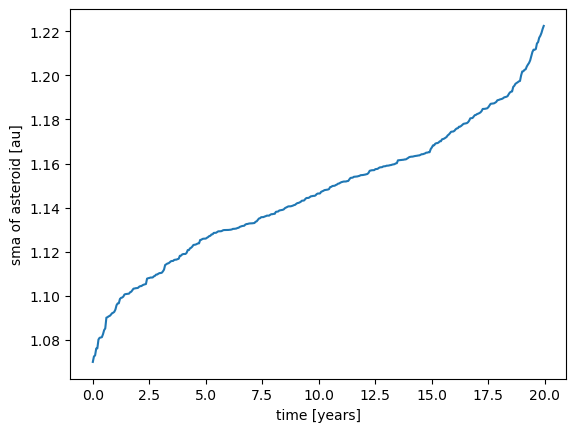

In [7]:
import matplotlib.pyplot as plt

#Manage positions.
asteroid_position = np.array(system.position_hist["asteroids"])
star_position = np.array(system.position_hist["stars"])
planet_positions = np.array(system.position_hist["planets"]) 

#Manage acceleration.
acceleration_hist = np.array(system.acceleration_hist)
acc_x, ind = np.unique(acceleration_hist[:,0], return_index=True)
acc_x = acc_x[np.argsort(ind)]
acc_y, ind = np.unique(acceleration_hist[:,1], return_index=True)
acc_y = acc_y[np.argsort(ind)]
acc_z, ind = np.unique(acceleration_hist[:,2], return_index=True)
acc_z = acc_z[np.argsort(ind)]

acc_x = np.hstack((acceleration_hist[:,0][0], acceleration_hist[:,0][2:-2][::4], acceleration_hist[:,0][-1]))
acc_y = np.hstack((acceleration_hist[:,1][0], acceleration_hist[:,1][2:-2][::4], acceleration_hist[:,1][-1]))
acc_z = np.hstack((acceleration_hist[:,2][0], acceleration_hist[:,2][2:-2][::4], acceleration_hist[:,2][-1]))

#Plot.
plt.plot(asteroid_position[:,0], asteroid_position[:,1], lw = 1)
for i in range(planet_positions.shape[2]):
    plt.plot(planet_positions[:,0,i], planet_positions[:,1,i], lw = 1)

plt.scatter(star_position[0,0], star_position[0,1], color='orange')

plt.quiver(asteroid_position[:,0], asteroid_position[:,1], acc_x, acc_y, alpha=.5)
plt.show()

#Manage semi-major axis.
sma = np.unique(system.semimajor_hist)
times = np.arange(0, endtime, timestep)

#Plot.
plt.plot(times, sma)
plt.ylabel("sma of asteroid [au]")
plt.xlabel("time [years]")